<a href="https://colab.research.google.com/github/jancyrillmendoza/IBM-Data-Analysis/blob/main/_IBM_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from copy import deepcopy

In [80]:
path = '/content/drive/Shareddrives/MSDS 501 Group 1 /dataset/'
hr = path + 'WA_Fn-UseC_-HR-Employee-Attrition.csv'

In [103]:
RAW = pd.read_csv(hr)

In [104]:
RAW.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [105]:
RAW.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [106]:
RAW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [112]:
def get_categoricals(dataframe):
  colnames = []
  for col in dataframe:
    dt = dataframe[col].dtype
    if(dt == 'object'):
      colnames.append(col)
  return colnames

In [113]:
categoricals = get_categoricals(RAW)
non_categoricals = RAW.drop(columns=categoricals)

## Plot Non-Categorical Features

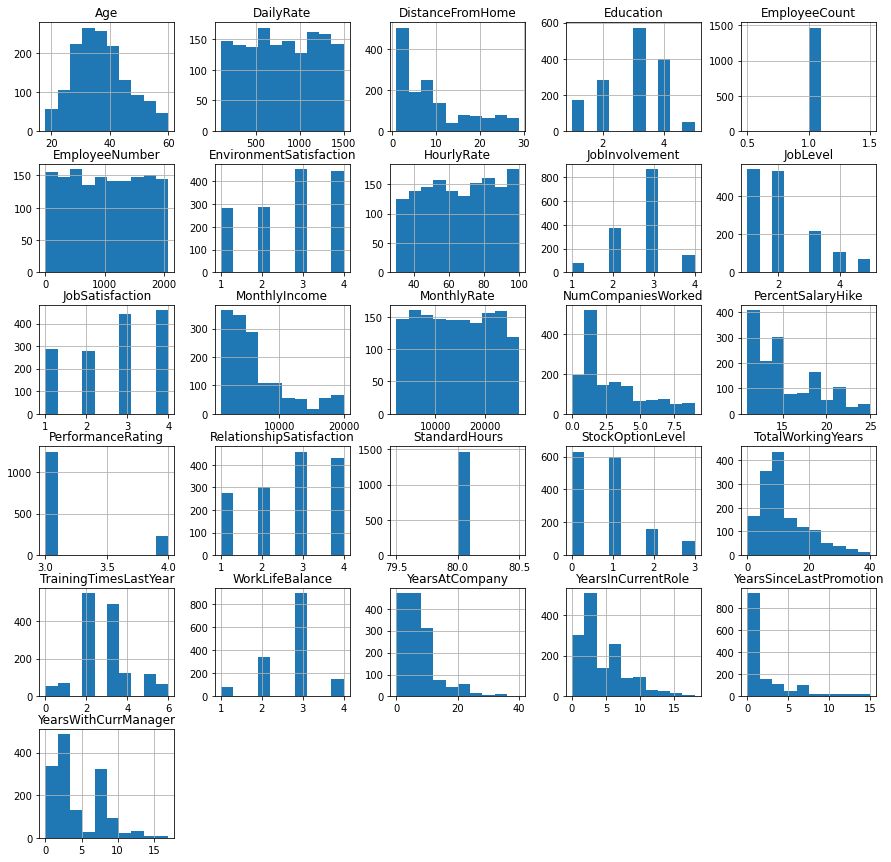

In [114]:
non_categoricals.hist(figsize=(15,15))
plt.show()

## Plot Categorical Features

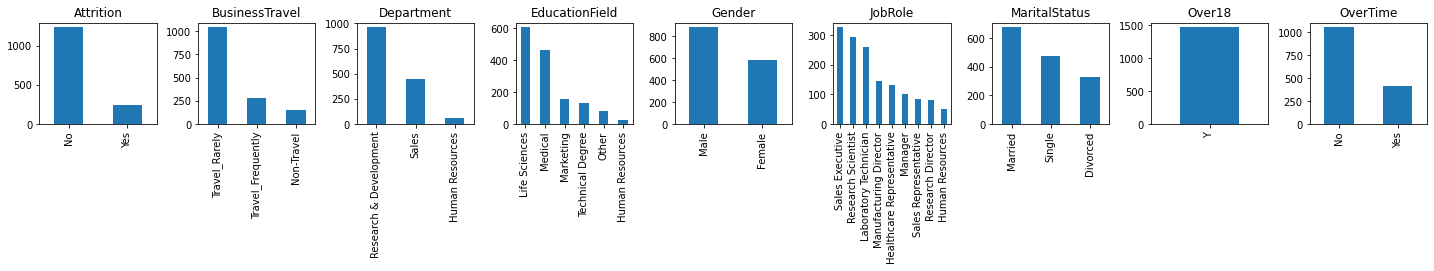

In [115]:
fig, ax = plt.subplots(1, len(categoricals), figsize=(20,2))
fig.tight_layout() 
for i, feature in enumerate(RAW[categoricals]):
    RAW[feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(feature)
fig.show()

## View Target Correlations

In [178]:
# Find correlations with the target and sort
data = deepcopy(RAW)
data['Target'] = data['Attrition'].apply(lambda x: 0 if x == 'No' else 1)
data = data.drop(['Attrition'], axis=1)

correlations = data.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(4))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 DistanceFromHome    0.077924
Target              1.000000
EmployeeCount            NaN
StandardHours            NaN
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


## Encode Categorical Feaures

In [179]:
def encode(dataframe):
  d = deepcopy(dataframe)
  for col in dataframe:
    dt = dataframe[col].dtype
    if(dt == 'object'):
      print('encoded:', col)
      # get all unique vals
      unique = d[col].unique()
      codes = {}
      for i, v in enumerate(unique):
        codes[v] = i
      d[col] = d[col].apply(lambda x: codes[x])
  return d

In [187]:
encoded_data = encode(data)
encoded_data.head()

encoded: BusinessTravel
encoded: Department
encoded: EducationField
encoded: Gender
encoded: JobRole
encoded: MaritalStatus
encoded: Over18
encoded: OverTime


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Target
0,41,0,1102,0,1,2,0,1,1,2,...,80,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,0,1,2,3,...,80,1,10,3,3,10,7,1,7,0
2,37,0,1373,1,2,2,1,1,4,4,...,80,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,0,1,5,4,...,80,0,8,3,3,8,7,3,0,0
4,27,0,591,1,2,1,2,1,7,1,...,80,1,6,3,3,2,2,2,2,0


## Remove Outliers

In [188]:
def Winsorization_outliers(colname, df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    out = []
    for i in df:
        if (i > q3 or i < q1) and i>0:
            out.append(i)
    if(len(out) != 0):
      print(colname,'outliers:', len(out))
    return out

def remove_outliers(df):
    for col in df.columns[1:]:
        if df[col].dtype != 'object':
            data_filter = Winsorization_outliers(col, df[col])
            df = df[~df[col].isin(data_filter)]
    return df

cleaned_data = remove_outliers(encoded_data)

DailyRate outliers: 26
EmployeeNumber outliers: 30
MonthlyIncome outliers: 30
MonthlyRate outliers: 28
TotalWorkingYears outliers: 14
YearsAtCompany outliers: 12
YearsInCurrentRole outliers: 11
YearsSinceLastPromotion outliers: 13
YearsWithCurrManager outliers: 9


## View Correlations

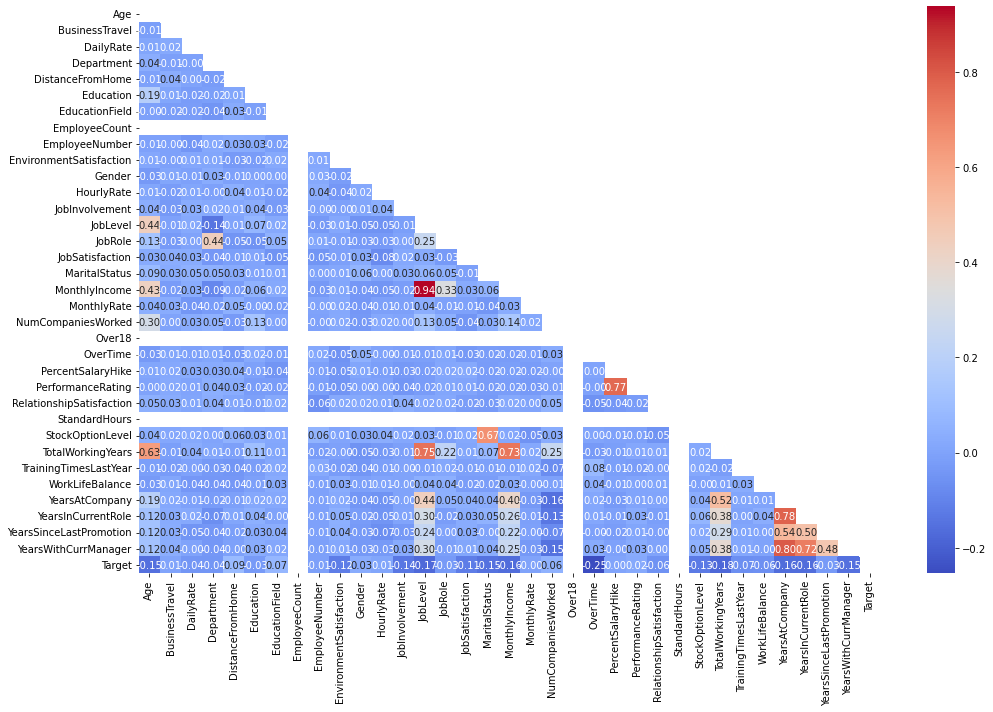

In [189]:
# Calculate correlations
corr = cleaned_data.corr()
plt.figure(figsize=(15, 10))
mask = np.triu(corr)
#for col in corr.columns:
#  corr.loc[corr[col] < 0.5, col] = 0
sns.heatmap(corr, annot = True, fmt = '.2f', mask = mask, cmap='coolwarm')
plt.tight_layout()

## Get X, y

In [194]:
y = cleaned_data['Target']
X = cleaned_data.drop(columns = ['Target'])

## Rescale (StandardScaler)

In [196]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for col in X:
    X[col] = X[col].astype(float)
    X[[col]] = scaler.fit_transform(X[[col]])
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
16,-0.497061,-0.590288,-1.189998,0.504031,-0.508000,-0.882055,-1.027217,0.0,-1.704016,-1.588561,...,1.205180,0.0,1.380725,-0.516623,1.699557,-1.073924,-0.068732,-0.594983,-0.705949,0.342574
17,-1.633277,2.423901,0.801798,0.504031,0.860511,-0.882055,0.372258,0.0,-1.702314,1.173321,...,-0.647954,0.0,1.380725,-1.418655,-0.632240,-1.073924,-1.086381,-1.199047,-0.705949,-1.189560
18,1.888991,-0.590288,1.044146,-1.390832,-0.881230,1.073544,-1.027217,0.0,-1.700611,-1.588561,...,0.278613,0.0,-0.929985,3.091506,0.145026,0.343044,3.798332,1.217211,0.415671,0.955428
19,0.184668,-0.590288,-1.096593,0.504031,-0.881230,0.095744,-1.027217,0.0,-1.698908,1.173321,...,0.278613,0.0,-0.929985,-0.666961,0.145026,0.343044,-0.679322,-0.594983,-0.332075,-0.576706
20,-1.406034,2.423901,-0.334207,0.504031,0.238461,-0.882055,-0.327479,0.0,-1.695503,-1.588561,...,1.205180,0.0,0.225370,-0.817300,1.699557,-1.073924,-0.475792,-0.594983,-0.332075,-0.270279


## Benchmarking Models

In [197]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (classification_report,
                             confusion_matrix,
                             plot_confusion_matrix,
                             roc_curve, 
                             roc_auc_score)

In [198]:
LR = LogisticRegression(random_state = 6)
KNN = KNeighborsClassifier()
GNB = GaussianNB()
ET = ExtraTreesClassifier()
MLPC = MLPClassifier(activation='relu', solver='adam', learning_rate_init=0.01)

In [199]:
model_names = ['K-Nearest Neighbors', 
               'Logistic Regression', 
               'Gaussian Naive Bayes',
               'Extra Trees',
               'MLPC']
models = [KNN, LR, GNB, ET, MLPC]

## Functions for Cross Validation and Scoring

In [253]:
def cross_validate(names, models, _X_train, _y_train, index, cv=3):
  res = []
  for model in models:
    draft = model_selection.cross_val_score(model, _X_train, _y_train, cv=cv)
    res.append(draft)
  index = [index+' CV_' + str(i) for i in range(cv)]
  accuracy = pd.DataFrame(np.array(res).T, 
                          columns=names, 
                          index=index,
                          ).round(decimals=3)
  return accuracy

In [250]:
def get_score(names, models, _X_train, _y_train, _X_test, _y_test, index):
  res = {' ':[index]}
  for n, model in enumerate(models):
    trained = model.fit(_X_train, _y_train)
    score = trained.score(_X_test, _y_test)
    res[names[n]] = score
  df = pd.DataFrame(res).set_index(' ')
  return df

# No Dropped Feats

## Split Train, Test (No Dropped Feats)

In [200]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=0.25)  
print(X_train.shape)                                                 
print("Number of features:",X_train.shape[1])

(972, 34)
Number of features: 34


## Cross Validation (No Dropped Feats)

In [254]:
accuracy = cross_validate(model_names, models, X_train, y_train, 'No Dropped Feats')
accuracy

,K-Nearest Neighbors,Logistic Regression,Gaussian Naive Bayes,Extra Trees,MLPC
No Dropped Feats CV_0,0.843,0.870,0.793,0.855,0.827
No Dropped Feats CV_1,0.864,0.880,0.759,0.855,0.858
No Dropped Feats CV_2,0.840,0.895,0.790,0.864,0.877


## Train and Test Scoring (No Dropped Feats)

In [262]:
scores = get_score(model_names, models, X_train, y_train, X_test, y_test, 'No Dropped Feat Scores')
scores

,K-Nearest Neighbors,Logistic Regression,Gaussian Naive Bayes,Extra Trees,MLPC
,,,,,
No Dropped Feat Scores,0.830769,0.836923,0.747692,0.836923,0.815385


# With **PCA**

## Perform PCA

In [119]:
from sklearn.decomposition import PCA

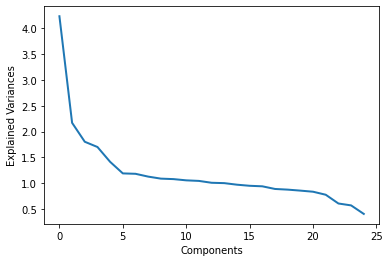

In [207]:
pca = PCA(n_components=25).fit(X, y=y)
PCA_X = pca.transform(X)
plt.plot(pca.explained_variance_, linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained Variances')
plt.show()

## Split Train, Test (PCA)

In [227]:
from sklearn import model_selection
PCA_X_train, PCA_X_test, PCA_y_train, PCA_y_test = model_selection.train_test_split(PCA_X,
                                                                    y,
                                                                    test_size=0.25)
print(PCA_X_train.shape)
print("Number of features:",PCA_X_train.shape[1])

(972, 25)
Number of features: 25


## Cross Validation (PCA)

In [255]:
PCA_accuracy = cross_validate(model_names, models, PCA_X_train, PCA_y_train, 'PCA')
PCA_accuracy

,K-Nearest Neighbors,Logistic Regression,Gaussian Naive Bayes,Extra Trees,MLPC
PCA CV_0,0.827,0.877,0.864,0.843,0.836
PCA CV_1,0.836,0.864,0.833,0.836,0.806
PCA CV_2,0.833,0.855,0.830,0.836,0.827


## Train and Test Scoring (PCA)

In [259]:
PCA_scores = get_score(model_names, models, PCA_X_train, PCA_y_train, PCA_X_test, PCA_y_test, 'PCA Scores')
PCA_scores

,K-Nearest Neighbors,Logistic Regression,Gaussian Naive Bayes,Extra Trees,MLPC
,,,,,
PCA Scores,0.858462,0.867692,0.858462,0.852308,0.830769


# With **TSNE**

## Perform TSNE

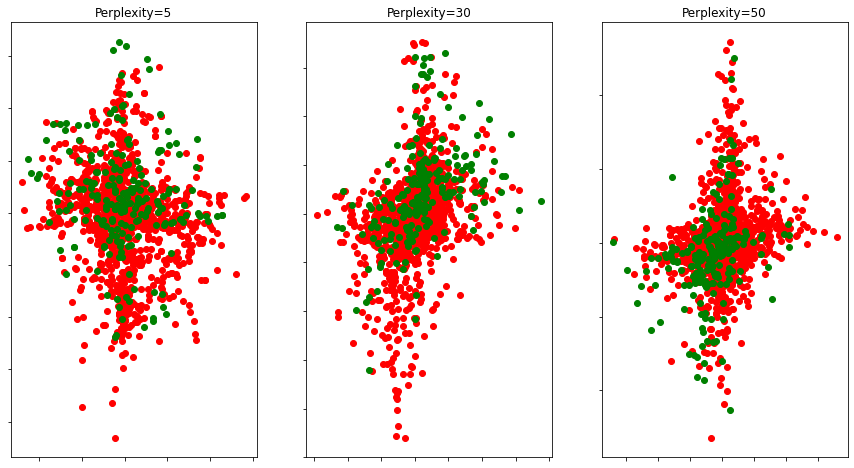

In [218]:
from matplotlib.ticker import NullFormatter
from sklearn.manifold import TSNE

(fig, subplots) = plt.subplots(1, 3, figsize=(15, 8))
perplexities = [5, 30, 50]
n_components = 25

red = y == 0
green = y == 1

for i, perplexity in enumerate(perplexities):
    ax = subplots[i]

    tsne_X = TSNE(
        n_components=n_components,
        method='exact',
        init="random",
        random_state=0,
        perplexity=perplexity,
        learning_rate="auto",
        n_iter=300,
    ).fit_transform(X, y=y)
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(tsne_X[red, 0], tsne_X[red, 1], c="r")
    ax.scatter(tsne_X[green, 0], tsne_X[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

## Split Train, Test (TSNE)

In [230]:
from sklearn import model_selection
tsne_X_train, tsne_X_test, tsne_y_train, tsne_y_test = model_selection.train_test_split(tsne_X,
                                                                    y,
                                                                    test_size=0.25)

print(tsne_X.shape)
print("Number of features:", tsne_X.shape[1])

(1297, 25)
Number of features: 25


## Cross Validation (TSNE)

In [256]:
TSNE_accuracy = cross_validate(model_names, models, tsne_X_train, tsne_y_train, 'TSNE')
TSNE_accuracy

,K-Nearest Neighbors,Logistic Regression,Gaussian Naive Bayes,Extra Trees,MLPC
TSNE CV_0,0.864,0.836,0.701,0.849,0.802
TSNE CV_1,0.843,0.840,0.753,0.858,0.827
TSNE CV_2,0.830,0.849,0.744,0.846,0.790


## Train and Test Scoring (TSNE)

In [260]:
TSNE_scores = get_score(model_names, models, tsne_X_train, tsne_y_train, tsne_X_test, tsne_y_test, 'TSNE Scores')
TSNE_scores

,K-Nearest Neighbors,Logistic Regression,Gaussian Naive Bayes,Extra Trees,MLPC
,,,,,
TSNE Scores,0.818462,0.833846,0.710769,0.84,0.784615


# SUMMARY

## Cross Validation

In [267]:
pd.concat([accuracy, PCA_accuracy, TSNE_accuracy])

,K-Nearest Neighbors,Logistic Regression,Gaussian Naive Bayes,Extra Trees,MLPC
No Dropped Feats CV_0,0.843,0.870,0.793,0.855,0.827
No Dropped Feats CV_1,0.864,0.880,0.759,0.855,0.858
No Dropped Feats CV_2,0.840,0.895,0.790,0.864,0.877
PCA CV_0,0.827,0.877,0.864,0.843,0.836
PCA CV_1,0.836,0.864,0.833,0.836,0.806
PCA CV_2,0.833,0.855,0.830,0.836,0.827
TSNE CV_0,0.864,0.836,0.701,0.849,0.802
TSNE CV_1,0.843,0.840,0.753,0.858,0.827
TSNE CV_2,0.830,0.849,0.744,0.846,0.790


## Train, Test Scoring

In [266]:
pd.concat([scores, PCA_scores, TSNE_scores])

,K-Nearest Neighbors,Logistic Regression,Gaussian Naive Bayes,Extra Trees,MLPC
,,,,,
No Dropped Feat Scores,0.830769,0.836923,0.747692,0.836923,0.815385
PCA Scores,0.858462,0.867692,0.858462,0.852308,0.830769
TSNE Scores,0.818462,0.833846,0.710769,0.840000,0.784615
